## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [ ]:
# !pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, with_replacement=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=with_replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 2)
cards

array([[42, 63],
       [40, 78],
       [30, 94],
       [36, 52],
       [26, 70],
       [21, 90]])

and access the cards of each player with 

In [6]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([42, 63]), array([40, 78]))

The lowest card in the game is

In [7]:
np.min(cards)

21

In [8]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

Cards per player = 1


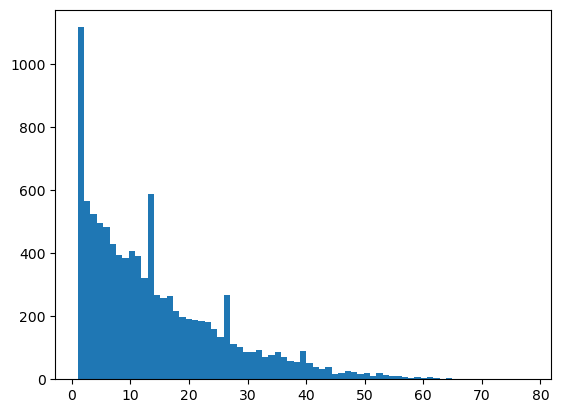

Cards per player = 2


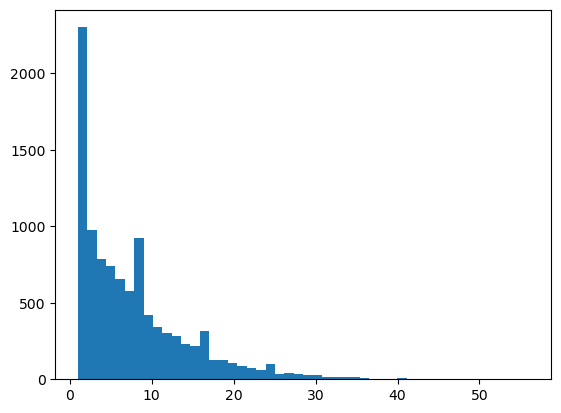

Cards per player = 3


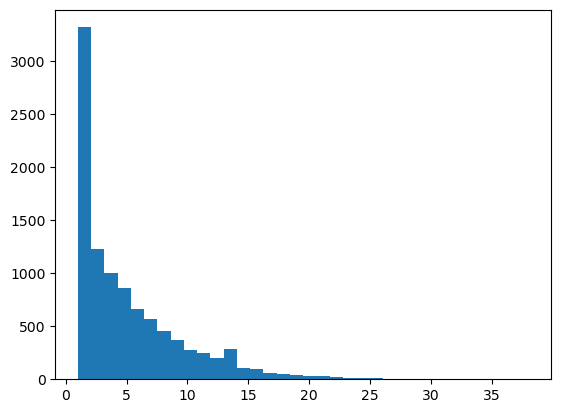

Cards per player = 4


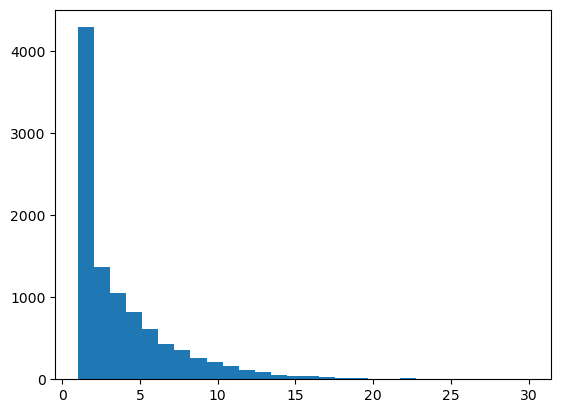

Cards per player = 5


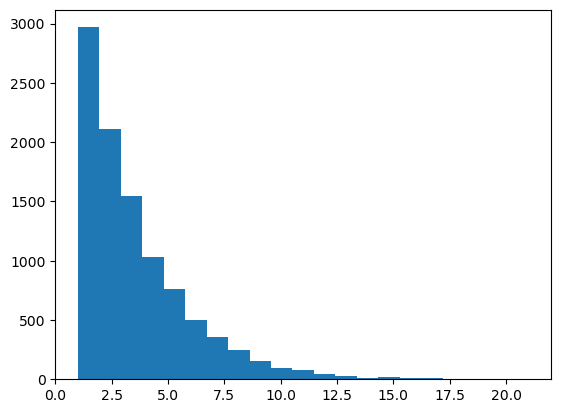

In [9]:
# To Do cell
import random

random.seed(1)  # set random seed for reproducibility
N = 100 # number of cards
n = 6 # number of players
# k = 1 # cards per player
for k in np.arange(1, 6):
    cards_min = []
    for i in range(10000): 
        cards = sample_cards(N, n, k)
        cards_min.append(np.min(cards))
    print('Cards per player = {}'.format(k))
    num_cards = len(set(cards_min))
    plt.hist(cards_min, bins=num_cards)
    plt.show()
    

In [10]:
# print(cards_min)
# cards = sample_cards()


### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

Params: N = 100, n = 6, k = 2


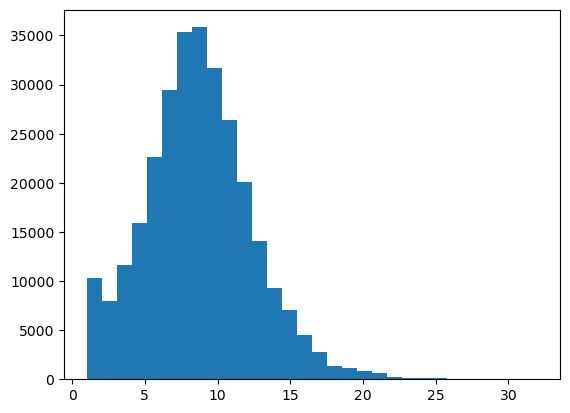

In [11]:
# To Do cell
print('Params: N = {}, n = {}, k = {}'.format(N, n, 2))

def get_largest_consecutive_gaps_list(total_cards, total_players, cards_per_player, simulation_iterations):
    """
    This function simulates rounds of the game 'The Mind' to obtain a list of the largest consecutive gaps 
    across all cards within each round.

    Parameter
    ---------
    total_cards : int
        The total number of possible cards that could be drawn.

    total_players : int
        Total number of players in each round.

    cards_per_player : int
        Self-explanatory.

    simulation_iterations: int
        Number of times to simulate obtaining the largest gap.

    Returns
    -------
    list
        List of ints with length simulated_iterations, representing the largest gaps for each simulated round.

    """
    max_distances_list = []
    for i in np.arange(1, simulation_iterations): 
        cards = sample_cards(total_cards, total_players, cards_per_player)
        transformed_cards = np.reshape(cards, total_players*cards_per_player)
        transformed_cards = np.sort(transformed_cards)
        max_distance = 0
        for j, card in enumerate(transformed_cards):
            if j == 0: continue 
            previous_card = transformed_cards[j-1]
            consecutive_distance = card - previous_card
            if consecutive_distance > max_distance:
                max_distance = consecutive_distance
            max_distances_list.append(max_distance)
    return max_distances_list
largest_consecutive_gaps_list = get_largest_consecutive_gaps_list(total_cards=N, total_players=n, cards_per_player=k, simulation_iterations=10000)
num_bins = len(set(largest_consecutive_gaps_list))
plt.hist(largest_consecutive_gaps_list, bins=num_bins)
plt.show()


Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

Params: N = 100, n = 6, k = 2


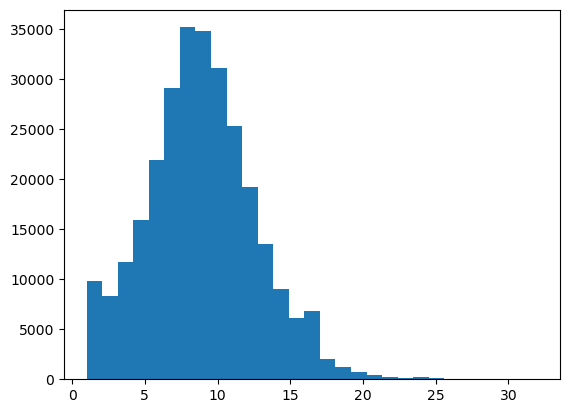

In [12]:
# To Do cell
print('Params: N = {}, n = {}, k = {}'.format(N, n, 2))
# Function that determines whether two cards belong to the same player
def is_same_player(cards, card1, card2):
    """
    This function determines whether two cards belong to the same player.

    Parameter
    ---------
    cards : numpy.ndarray
        Numpy array of cards. 

    card1 : int
        Element of numpy.ndarray to check membership for

    card2 : int
        Another element of numpy.ndarray to check membership for

    Returns
    -------
    bool
        Whether both cards ('card1' and 'card2') belong to the same player, according to the 
        supplied numpy.ndarray 'cards'.
        
    """

    for player_id in np.arange(cards.shape[0]):
        player_cards = cards[player_id, :]
        if all([card in player_cards for card in [card1, card2]]):
            return True
        else:
            return False

def get_largest_consecutive_gaps_excl_player_list(total_cards, total_players, cards_per_player, simulation_iterations, 
                                                  fix_look_back_to_one=True):
    """
    This function simulates rounds of the game 'The Mind' to obtain a list of the largest consecutive gaps 
    that exist across different players' hands within each round.

    Parameter
    ---------
    total_cards : int
        The total number of possible cards that could be drawn.

    total_players : int
        Total number of players in each round.

    cards_per_player : int
        Self-explanatory.

    simulation_iterations: int
        Number of times to simulate obtaining the largest gap.
    
    fix_look_back_to_one: bool, default True
        If True, then we only check for distances across consecutive cards. If False, then when a 
        consecutive distance is found to be within a single player's hand (and is therefore invalid) 
        we extend the search beyond the consecutive card to the next closest one that belongs to 
        another player. For an accurate simulation of the game The Mind, set this parameter to True. 

    Returns
    -------
    list
        List of ints with length simulated_iterations, representing the largest gaps across players' hands 
        for each simulated round.
        
    """
        
    max_distances_list = []
    for i in np.arange(1, simulation_iterations): 
        cards = sample_cards(total_cards, total_players, cards_per_player)
        transformed_cards = np.reshape(cards, total_players*cards_per_player)
        transformed_cards = np.sort(transformed_cards)
        max_distance = 0
        for j, card in enumerate(transformed_cards):
            if j == 0: continue 
            # print('({}) Card: {}, Previous card: {}'.format(j, card, previous_card)) 
            look_back_index = 1
            if fix_look_back_to_one:
                if is_same_player(cards=cards, card1=card, card2=transformed_cards[j-look_back_index]):
                    continue
            else:
                while is_same_player(cards=cards, card1=card, card2=transformed_cards[j-look_back_index]): 
                    if fix_look_back_to_one: break
                    # print('same player. Skipping...')
                    if look_back_index > 2:
                        print('Had to look back multiple times')
                    look_back_index += 1
                    if j - look_back_index < 0:  # end of list
                        break
                    continue
            consecutive_distance = card - transformed_cards[j-look_back_index]
            if consecutive_distance > max_distance:
                max_distance = consecutive_distance
            max_distances_list.append(max_distance)
    return max_distances_list

max_distances_list = get_largest_consecutive_gaps_excl_player_list(total_cards=N, total_players=n, cards_per_player=k, simulation_iterations=10000)
num_bins = len(set(max_distances_list))
plt.hist(max_distances_list, bins=num_bins)
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [ ]:
# !pip install pandas

In [13]:
# To Do cell
import statistics
import pandas as pd

def list_of_lists_to_dataframe(list_of_lists, column_names):
    return pd.DataFrame(data=list_of_lists, columns=column_names)
        
iterations_per_simulation = 10000
i = 0
simulations_list_excluding_own = []
simulations_list_all = []
simulation_list_of_lists = []  # [all (T/F), N, n, k, mean, median]
for total_cards in [10, 50, 100, 300, 1000]:
    for total_players in [2, 3, 4, 5, 6, 8, 10]:
        for cards_per_player in [1, 2, 3, 4, 5, 10]:
            i += 1
            if cards_per_player * total_players > total_cards: 
                continue
                
            max_distances_list_excluding_own = get_largest_consecutive_gaps_excl_player_list(
                total_cards=total_cards, total_players=total_players, cards_per_player=cards_per_player, simulation_iterations=iterations_per_simulation)
            mean_excluding_own = round(np.mean(max_distances_list_excluding_own), 2)
            median_excluding_own = statistics.median(max_distances_list_excluding_own)
            
            simulation_list_of_lists.append([False, total_cards, total_players, cards_per_player, mean_excluding_own, median_excluding_own])
                                            
            max_distances_list_all = get_largest_consecutive_gaps_list(
                total_cards=total_cards, total_players=total_players, cards_per_player=cards_per_player, simulation_iterations=1000)
            
            mean_all = round(np.mean(max_distances_list_all), 2)
            median_all = statistics.median(max_distances_list_all)                
            
            simulation_list_of_lists.append([True, total_cards, total_players, cards_per_player, mean_all, median_all])
            if i % 100 == 0:
                print('({}) N = {}, n = {}, k = {}, \
                      mean_all = {}, mean_excl = {}, median_all = {}, median_excl = {}'\
                      .format(i, total_cards, total_players, cards_per_player, mean_all, mean_excluding_own, median_all, median_excluding_own))
simulations_df = list_of_lists_to_dataframe(simulation_list_of_lists, column_names=['all', 'total_cards', 'total_players', 'cards_per_player', 'mean_max_distance', 'median_max_distance'])
            

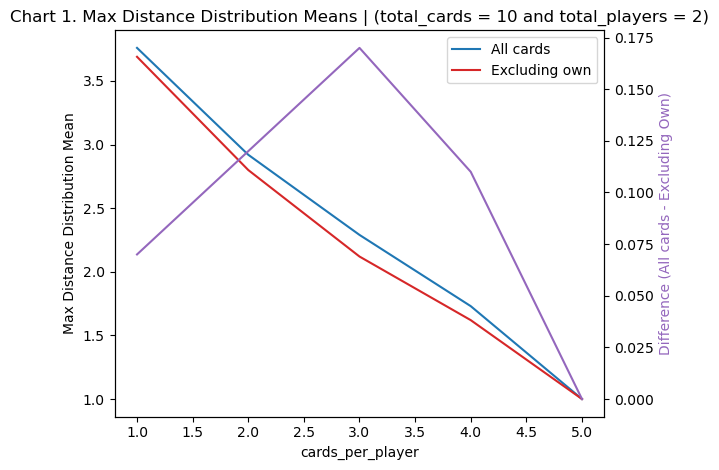

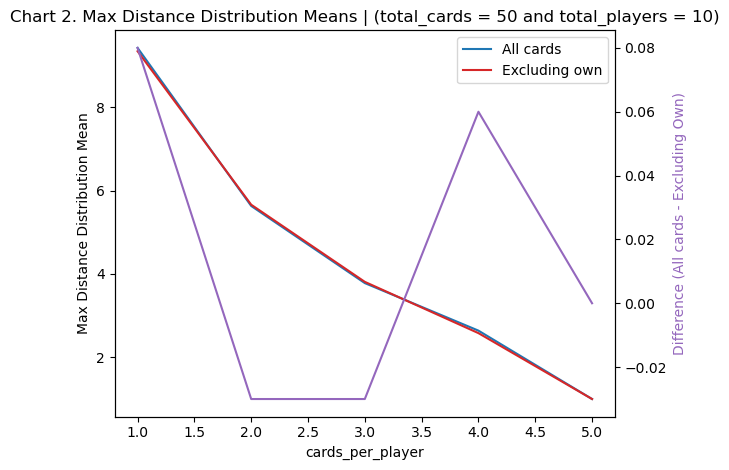

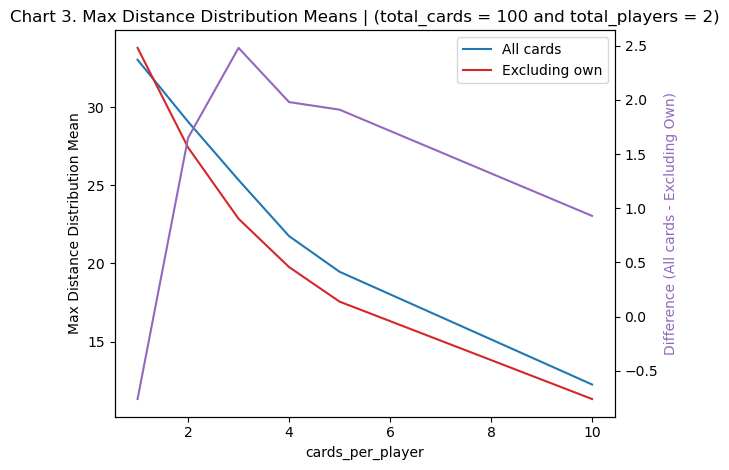

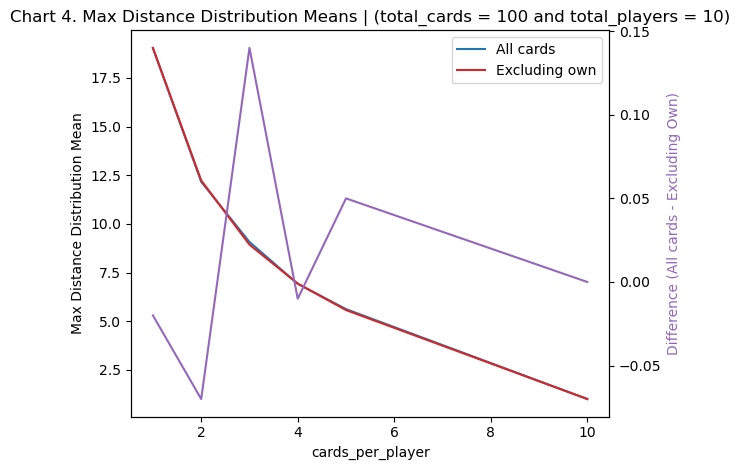

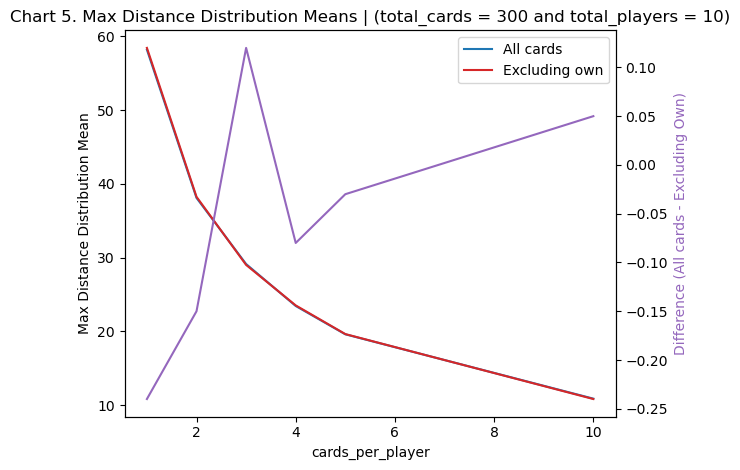

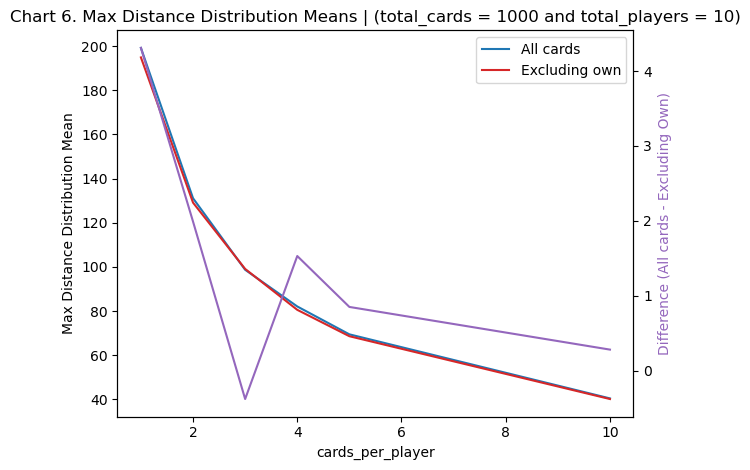

In [16]:
def plot_means(simulations_df, fixed_var_one, fixed_var_one_value, fixed_var_two, fixed_var_two_value, 
               x_var, chart_number):
    """
    This function prints out a plot with two lines: one representing the mean of the max consecutive distance 
    when all cards are considered (labeled 'All cards' and shown in blue), and the other is the mean of the max 
    consecutive distance across player's hands (labeled 'Excluding own' and shown in red). 

    Parameter
    ---------
    simulations_df : pandas DataFrame
        Dataframe with simulation data, with the following columns: 
        ['all', 'total_cards', 'total_players', 'cards_per_player', 'mean_max_distance'].

    fixed_var_one : str
        One of 'total_cards', 'total_players', or 'cards_per_player'. 

    fixed_var_one_value : int
        An integer constraining one of the variables. 
        If fixed_var_one == 'total_cards', then fixed_var_one_value must be contained in [10, 50, 100, 300, 1000]. 
        If fixed_var_one == 'total_players', then must be contained in [2, 3, 4, 5, 6, 8, 10], 
        if fixed_var_one == 'cards_per_player', then must be contained in [1, 2, 3, 4, 5, 10]. 

    fixed_var_two: str
        One of 'total_cards', 'total_players', or 'cards_per_player'. 
        
    fixed_var_two_value : int
        An integer constraining one of the variables. 
        If fixed_var_one == 'total_cards', then fixed_var_one_value must be contained in [10, 50, 100, 300, 1000]. 
        If fixed_var_one == 'total_players', then must be contained in [2, 3, 4, 5, 6, 8, 10], 
        if fixed_var_one == 'cards_per_player', then must be contained in [1, 2, 3, 4, 5, 10].
    
    x_var: str
        One of 'total_cards', 'total_players', or 'cards_per_player' that is not fixed_var_one nor fixed_var_two.
        
    chart_number: int
        Number of chart to be displayed in the title, to simplify future referencing.

    Returns
    -------
    None. Does create a matplotlib plot. 
        
    """
    f_simulations_df = simulations_df[(simulations_df[fixed_var_one] == fixed_var_one_value) & (simulations_df[fixed_var_two] == fixed_var_two_value)]
    f_simulations_df.head()
    all_x = f_simulations_df[f_simulations_df['all'] == True][x_var]
    excl_x = f_simulations_df[f_simulations_df['all'] == False][x_var]
    all_y = f_simulations_df[f_simulations_df['all'] == True]['mean_max_distance']
    excl_y = f_simulations_df[f_simulations_df['all'] == False]['mean_max_distance']
    diff_all_minus_excl = np.array(all_y) - np.array(excl_y)
    
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(all_x, all_y, label='All cards', color='tab:blue');
    ax.plot(all_x, excl_y, label='Excluding own', color='tab:red')
    
    ax.set_xlabel(x_var)
    ax.set_ylabel('Max Distance Distribution Mean')
    ax.set_title('Chart {}. Max Distance Distribution Means | ({} = {} and {} = {})'.format(chart_number, fixed_var_one, fixed_var_one_value, fixed_var_two, fixed_var_two_value))
    plt.legend()
    right_ax = ax.twinx() 
    right_ax.plot(all_x, diff_all_minus_excl, label = 'Diff', color='tab:purple')
    right_ax.set_ylabel('Difference (All cards - Excluding Own)', color='tab:purple')
    fig.tight_layout()
    

plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 10, fixed_var_two='total_players', fixed_var_two_value = 2,  x_var='cards_per_player', chart_number=1)
plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 50, fixed_var_two='total_players', fixed_var_two_value = 10,  x_var='cards_per_player', chart_number=2)
plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 100, fixed_var_two='total_players', fixed_var_two_value = 2,  x_var='cards_per_player', chart_number=3)
plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 100, fixed_var_two='total_players', fixed_var_two_value = 10,  x_var='cards_per_player', chart_number=4)
plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 300, fixed_var_two='total_players', fixed_var_two_value = 10,  x_var='cards_per_player', chart_number=5)
plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 1000, fixed_var_two='total_players', fixed_var_two_value = 10,  x_var='cards_per_player', chart_number=6)

        
# fig = plt.figure()
# ax = plt.axes()

# all_x = [s.cards_per_player for s in simulations_list_all if s.total_cards == 10 and s.total_players == 2]
# all_y = [s.max_distance_mean for s in simulations_list_all if s.total_cards == 10 and s.total_players == 2]
# excl_x = [s.cards_per_player for s in simulations_list_excluding_own if s.total_cards == 10 and s.total_players == 2]
# excl_y = [s.max_distance_mean for s in simulations_list_excluding_own if s.total_cards == 10 and s.total_players == 2]
# diff_all_minus_excl = np.array(all_y) - np.array(excl_y)
# ax.plot(all_x, all_y, label='All cards');
# ax.plot(all_x, excl_y, label='Excluding own')
# ax.plot(all_x, diff_all_minus_excl, label = 'Diff')


#### On the difference between Mean Max Distances of All Cards and Mean Max Distances Excluding those within your own hand

Lets define 'All' to be the case in which max distances are found across all cards, including within your own hand, and 'Excluding own' is the case when max distances can not exist within your own hand. Intuitively, 'Excluding Own' is like the 'All' case , but with a constraint. Therefore, we expect this constraint to decrease the mean max distance when compared to the unrestricted case. Lets analyze the problem by looking at the marginal distributions by fixing 2 variables, and letting the third vary. 

Lets consider when the total number of cards and the total number of players are fixed, but the number of cards per player varies. The first thing to realize is that, independent of N and n, if everyone has 1 card (i.e. k = 1) then it is impossible to have 2 consecutive cards within your own hand, and therefore All and Excluding Own should be equivalent. This is supported by Charts 1, 2 and 3, except for some uncertainty coming from the pseudo-random process in Chart 3. 
The second thing to realize is that the maximum possible value of k = N/n. When k takes this value, the max distance must be exactly 1 whether that's in the 'All' case or 'Excluding own' case. This is supported by charts 1, 2, and 4. 
The two realizations described so far, taken together, suggest that the difference in the means of the max distances should peak at some value of k between 1 and N/n. 
Charts 2, 4, 5 and 6 all show very small differences across 'All' and 'Excluding own' and they both have num_players = 10. It makes sense that as the number of players increases, it is less and less likely that the max distance will be contained within any one players' hand, and therefore, the larger n, the more the 'Excluding own' case resembles the 'All case', and therefore, the difference between the two cases approaches 0. 

To summarize, the fewer the number of players, the larger the difference between All and Excluding Own. As the number of players increases, the difference between the means across cases quickly drops. If the number of cards increases, the difference in the means increases as well. As the number of cards per player increases, relationship is more complicated due to the fact that it peaks at some point between k = 1 and k = N/n.




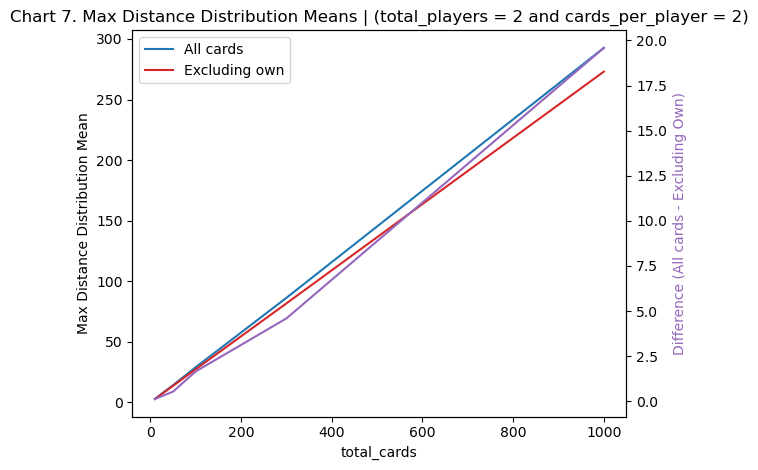

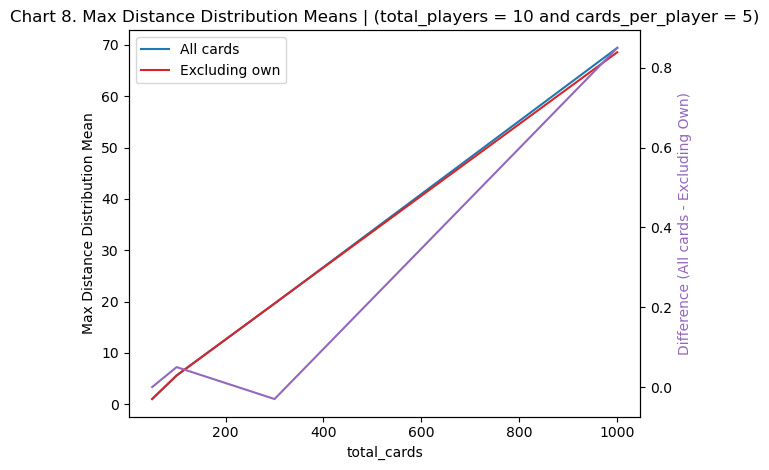

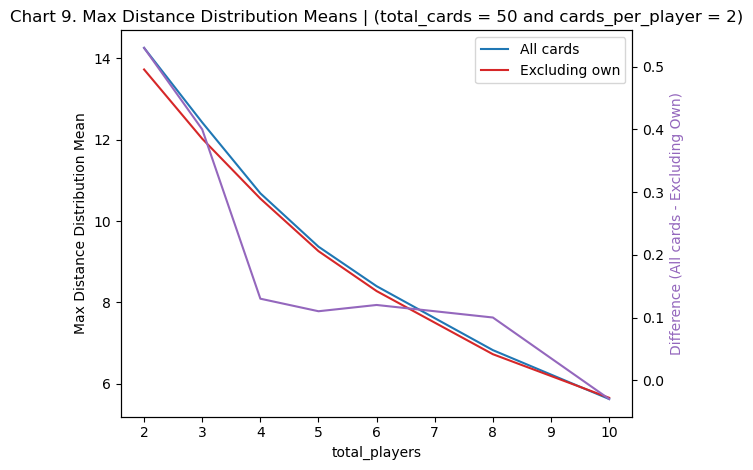

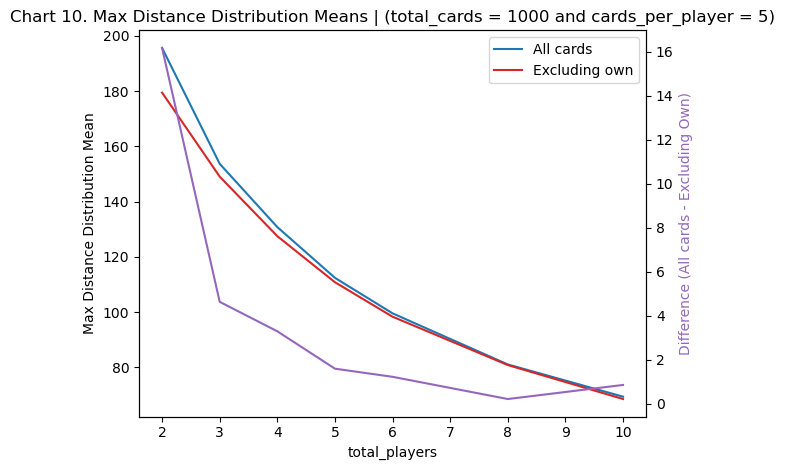

In [18]:
plot_means(simulations_df=simulations_df, fixed_var_one='total_players', fixed_var_one_value = 2, fixed_var_two='cards_per_player', fixed_var_two_value = 2,  x_var='total_cards', chart_number=7)
plot_means(simulations_df=simulations_df, fixed_var_one='total_players', fixed_var_one_value = 10, fixed_var_two='cards_per_player', fixed_var_two_value = 5,  x_var='total_cards', chart_number=8)

plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 50, fixed_var_two='cards_per_player', fixed_var_two_value = 2,  x_var='total_players', chart_number=9)
plot_means(simulations_df=simulations_df, fixed_var_one='total_cards', fixed_var_one_value = 1000, fixed_var_two='cards_per_player', fixed_var_two_value = 5,  x_var='total_players', chart_number=10)


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

### Rationale 
Say the total number of cards is N = 2i, where i is an integer and therefore N is even. We can create a random variable X, such that, if the card sampled is less than or equal to N/2, then X = 0, and if the card is larger than N/2, then X = 1. However, since the cards coming from the sample_cards() function are sampled without replacement by default, each card that we pick will not be independent and identically distributted Bernoulli random variables. 
Namely, the first card we pick will be a Bernoulli random variable with parameter p=0.5, but if that card is larger than N/2, then the probability of the second one being larger than N/2 is ((N/2) - 1)/N = 0.5 - (1/N), which is a different distribution than that of the first card. However, as N approaches infinity, that difference will approach 0.5, so if we select a huge number for N, we would be approximately picking independent and identically distributed Bernoulli random variables. 




In [20]:
# To Do cell
binomial_parameter_p = 0.5
bernoulli_count = 100
quasi_binomial_rvs = []
for simulation_iter in np.arange(10000):
    quasi_bernoulli_rvs = []
    # if simulation_iter % 100 == 0: print(simulation_iter)
    for card in sample_cards(N=total_cards, n=1, k=bernoulli_count)[0,:]:
        if card <= total_cards * binomial_parameter_p:
            quasi_bernoulli_rvs.append(0)
        else:
            quasi_bernoulli_rvs.append(1)
    quasi_binomial_rvs.append(np.sum(quasi_bernoulli_rvs))
    

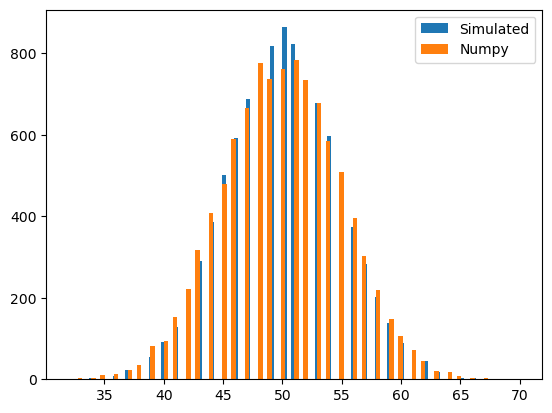

In [21]:
binomial_rvs = np.random.binomial(n=bernoulli_count, p=binomial_parameter_p, size=10000)
plt.hist(quasi_binomial_rvs, bins=100, label='Simulated')
plt.hist(binomial_rvs, bins=100, label='Numpy')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

#### Rationale
The lowest number is the first order statistic, so k=1. Hence, we compare our data from Part 1 with a Beta(1, n\*k + 1 - 1) = Beta(1, n\*k) distribution. 

In [23]:
# Sample a new set of cards
N = 100 # number of cards
n = 6 # number of players
k = 2 # cards per player
cards_min = []
transformed_x_list = []
for i in range(10000): 
    cards = sample_cards(N, n, k)
    min_card = np.min(cards)
    cards_min.append(min_card)
    transformed_x_list.append((1.0 * min_card) / N)
    

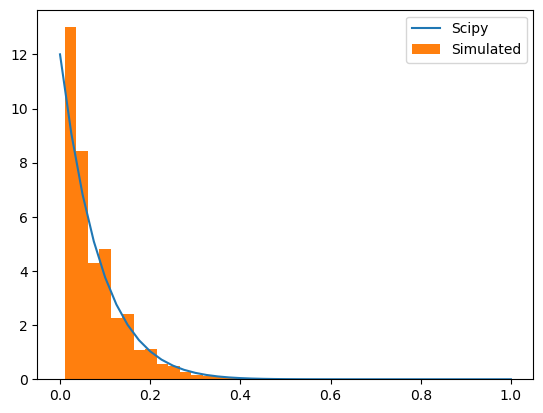

In [26]:
# To Do cell
#!pip install scipy
from scipy.stats import beta

x = np.linspace(0, 1, 41)
beta_pdf = beta.pdf(x, 1, n*k)
plt.plot(x, beta_pdf, label='Scipy')

# Transform min to be contained between 0 and 1
plt.hist(transformed_x_list, bins=20, density=True, label='Simulated')
plt.legend()
plt.show()


### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

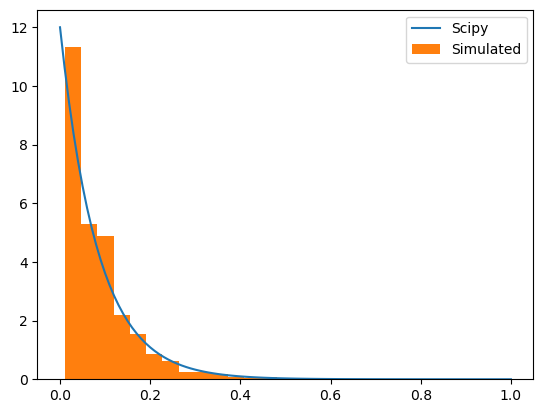

In [55]:
from scipy.stats import expon
import math 

x = np.linspace(0, 1, 101)
expon_pdf = expon.pdf(x, scale= (1 / (n*k)))
plt.plot(x, expon_pdf, label='Scipy')

x_list = []
for min_card in cards_min:
    x = -1.0 * math.log(1 - ((1.0 * min_card) / (N)))
    x_list.append(x)
    
plt.hist(x_list, bins=20, density=True, label='Simulated')
plt.legend()
plt.show()


### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

### Commentary: n*k << N
As N increases relative to n and k, we realize that the constraint of having to draw without replacement approximates that of drawing with replacement. 

Imagine if we are sampling with replacement and have a very large N relative to n and k. Once we extract a card, say X, the probability of extracting it again is 1/N which is very small for large N. As N approaches infinity, this probability approaches 0, which is precisely the probability of drawing the same card without replacement: it's impossible. Hence, drawing without replacement has a larger impact when our sample space N is small. When N is small, the difference between sampling strategies will be large, and when N is large, the difference between sampling strategies is small. 


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Rodrigo Palmaka
- Member No2: 
- Member No3: